In [1]:
import pandas as pd
import scipy as sp
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

```
비행기 탑승자수 분석 
월별 비행기 탑승자수 정보이다. 

airline_passengers.csv(구분자: comma(“,”), 144 Rows, 2 Columns)
```

In [2]:
df = pd.read_csv('data/airline_passengers.csv')
df

Month  Passengers
0    1949-01         112
1    1949-02         118
2    1949-03         132
3    1949-04         129
4    1949-05         121
..       ...         ...
139  1960-08         606
140  1960-09         508
141  1960-10         461
142  1960-11         390
143  1960-12         432

[144 rows x 2 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


## Q1

```
Passengers를 정규분포로 변환하기 위해 Box-Cox 변환을 수행하고자 한다. 

Box-Cox 변환을 위한 최적의 람다를 구하시오. 소수점 다섯째 자리에서 반올림 하여 넷째 자리까지 기술하시오.
(답안예시) 1.2345
```

<img src="https://miro.medium.com/max/884/1*_nHvGg-OQYtNSSZph-424g.png" style="float: left; margin: 0px 15px 15px 0px; width: 300px;"/>

Box-Cox 변환

[scipy.stats.boxcox](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html)

In [4]:
# Box-Cox 변환을 위한 최적의 람다
boxcox = # 코드 입력

best_lambda = boxcox[1]
print(f'best lambda: {best_lambda:.4f}')

best lambda: 0.1480


**정답: 0.1480**

## Q 2-1

다음과 같이 6개 변수를 생성한 후, 질문에 답하시오.

- Passengers_optimal : 이전에 구한 최적의 람다로 Box-Cox변환한 Passengers
- Passengers_lam0, Passengers_lam1 : Box-Cox의 람다를 각각 0,1로 하여 Box-Cox 변환한 Passengers
- Passengers_ln, Passengers_log, Passengers_sqrt : Passengers를 자연로그, 상용로그, 제곱근 변환한 Passengers 

In [5]:
# 이전에 구한 최적의 람다로 Box-Cox변환한 Passengers
Passengers_optimal = # 코드 입력
# Box-Cox의 람다를 0으로 변환
Passengers_lam0 = # 코드 입력
# Box-Cox의 람다를 1로 변환
Passengers_lam1 = # 코드 입력
# 자연로그
Passengers_ln = # 코드 입력
# 상용로그
Passengers_log = # 코드 입력
# 제곱근변환
Passengers_sqrt = # 코드 입력

In [7]:
passengers = {
    'Passengers_optimal': Passengers_optimal, 
    'Passengers_lam0': Passengers_lam0, 
    'Passengers_lam1': Passengers_lam1, 
    'Passengers_ln': Passengers_ln, 
    'Passengers_log': Passengers_log, 
    'Passengers_sqrt': Passengers_sqrt,
}

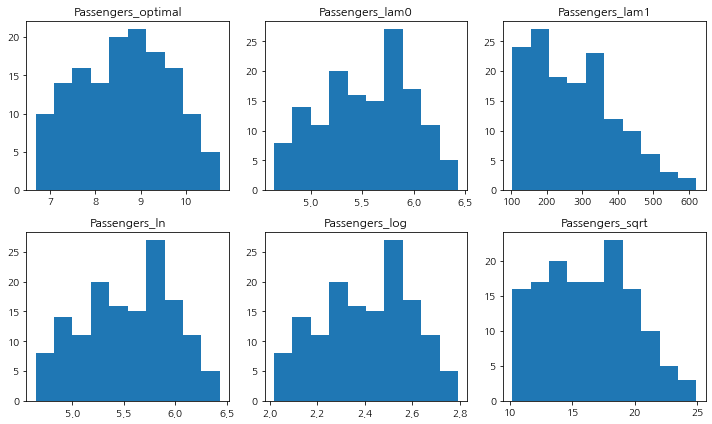

In [8]:
# 시각화
fig, axes = plt.subplots(2, 3)
fig.set_size_inches(10, 6)
for i, (k, v) in enumerate(passengers.items()):
    axes[i // 3, i % 3].hist(v)
    axes[i // 3, i % 3].set_title(k)
plt.tight_layout()
plt.show()

In [9]:
for k, v in passengers.items():
    print(f'{k}    \t{sp.stats.skew(v):.4f}')

Passengers_optimal    	-0.0212
Passengers_lam0    	-0.1207
Passengers_lam1    	0.5771
Passengers_ln    	-0.1207
Passengers_log    	-0.1207
Passengers_sqrt    	0.2201


**정답: -0.0212**

## Q 2-2

```
Passengers 와 새로 생성한 6개 변수에 대해 Jarque–Bera test로 정규성 검정을 수행할 때, 
유의수준 5%에서 정규성을 만족하는 변수를 모두 고르시오.

(답안예시) Passengers, Passengers_lam0
```

[scipy.stats.jarque_bera](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.jarque_bera.html)

In [10]:
for k, v in passengers.items():
    print(f'{k}    \t{sp.stats.jarque_bera(v).pvalue:.4f}')

Passengers_optimal    	0.0590
Passengers_lam0    	0.0493
Passengers_lam1    	0.0115
Passengers_ln    	0.0493
Passengers_log    	0.0493
Passengers_sqrt    	0.0624


**정답: Passengers_optimal, Passengers_sqrt**

## Q 2-3

```
Passengers, Passengers_optimal에 대해 히스토그램과 Q-Q plot을 그리시오.
```

Q-Q plot은 normal dist를 따를 때, quantile value와 현재 데이터 분포 상에서의 quantile 값을 scattering해주는 것과 비슷합니다.

plotting 결과가 선형 상에서 삐뚤게 나타나면, normal dist를 따르지 않고, 따르면 normal dist라고만 우선을 생각하셔도 아주 문제는 없습니다.

In [11]:
from scipy.stats import probplot

fig, axes = plt.subplots(1, 2)
fig.set_size_inches(10, 5)
sns.histplot(df['Passengers'], ax=axes[0])
probplot(df['Passengers'], plot=axes[1])
axes[0].set_title('Passengers (Histogram)')
axes[1].set_title('Passengers (Q-Q Plot)')
plt.show()

fig, axes = plt.subplots(1, 2)
fig.set_size_inches(10, 5)
sns.histplot(Passengers_optimal, ax=axes[0])
probplot(Passengers_optimal, plot=axes[1])
axes[0].set_title('Passengers_optimal (Histogram)')
axes[1].set_title('Passengers_optimal (Q-Q Plot)')
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)
